## Task 1:

### 1. Plotting Graphs:

- Plot two separate graphs:
1. Time vs FHR: This should display the fetal heart rate over time.
2. Time vs UC: This should display uterine contractions over time.

In [88]:
# load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# load data
data = pd.read_csv('task.csv')

In [90]:
data

,Time(ms),Fhr1(BPM),Fhr2(BPM),Uc(TOCO)
0,250,126,0,9
1,500,126,0,9
2,750,126,0,10
3,1000,126,0,10
4,1250,126,0,10
...,...,...,...,...
2395,599000,130,0,11
2396,599250,130,0,11
2397,599500,130,0,11
2398,599750,129,0,11


### Basic check

In [91]:
data.shape

(2400, 4)

In [92]:
data.columns

Index(['Time(ms)', 'Fhr1(BPM)', 'Fhr2(BPM)', 'Uc(TOCO)'], dtype='object')

In [93]:
data.rename(columns={'Fhr1(BPM)': 'FHR', 'Uc(TOCO)': 'UC','Time(Second)':'Time'}, inplace=True)

In [94]:
data.dtypes

Time(ms)     int64
FHR          int64
Fhr2(BPM)    int64
UC           int64
dtype: object

In [95]:
data.head()

,Time(ms),FHR,Fhr2(BPM),UC
0,250,126,0,9
1,500,126,0,9
2,750,126,0,10
3,1000,126,0,10
4,1250,126,0,10


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Time(ms)   2400 non-null   int64
 1   FHR        2400 non-null   int64
 2   Fhr2(BPM)  2400 non-null   int64
 3   UC         2400 non-null   int64
dtypes: int64(4)
memory usage: 75.1 KB


In [97]:
data.describe()

,Time(ms),FHR,Fhr2(BPM),UC
count,2400.000000,2400.000000,2400.0,2400.000000
mean,300125.000000,135.424167,0.0,28.877500
std,173241.161391,11.929454,0.0,21.197438
min,250.000000,123.000000,0.0,9.000000
25%,150187.500000,127.000000,0.0,11.000000
50%,300125.000000,128.000000,0.0,18.000000
75%,450062.500000,144.000000,0.0,46.000000
max,600000.000000,164.000000,0.0,84.000000


In the above describe Fhr2(BPM) both mean and std both are 0 so no meaning. so drop the column.

In [98]:
data=data.drop('Fhr2(BPM)',axis=1)

In [99]:
data.head()

,Time(ms),FHR,UC
0,250,126,9
1,500,126,9
2,750,126,10
3,1000,126,10
4,1250,126,10


In [133]:
data['Time(Second)']=data['Time(ms)']/1000
data.drop('Time(ms)',axis=1)

,FHR,UC,Time,Time(Second)
0,126,9,0.25,0.25
1,126,9,0.50,0.50
2,126,10,0.75,0.75
3,126,10,1.00,1.00
4,126,10,1.25,1.25
...,...,...,...,...
2395,130,11,599.00,599.00
2396,130,11,599.25,599.25
2397,130,11,599.50,599.50
2398,129,11,599.75,599.75


In [103]:
data.rename(columns={'Time(Second)':'Time'}, inplace=True)

Text(0, 0.5, 'FHR(BPM)')

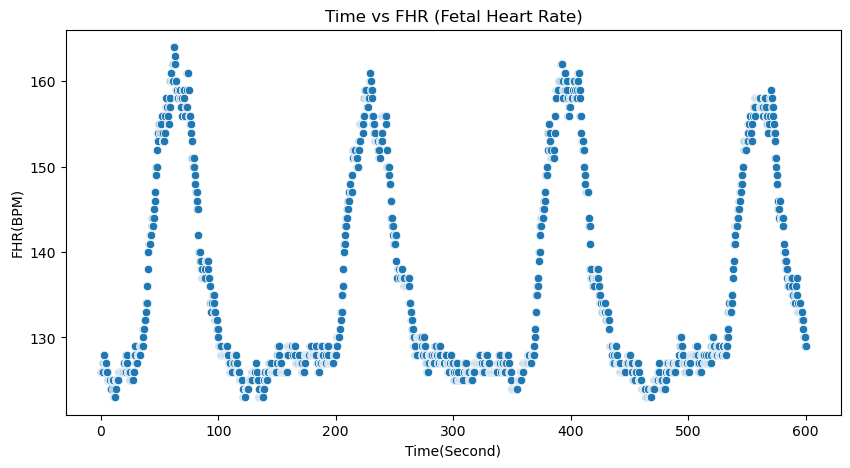

In [104]:
# plot the grap for Time vs FHR
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Time',y='FHR') # plot using seaborn
# plt.plot(data['Time(Second)'], data['Fhr1(BPM)']) # plot using matplotlib.pyplot
plt.title('Time vs FHR (Fetal Heart Rate)')
plt.xlabel('Time(Second)')
plt.ylabel('FHR(BPM)')

#### Every 100 Secound the FHR is Increseing and Decreseing. The firt 0-100 its increseing and 120-220 it decreseing

Text(0, 0.5, 'Uc(TOCO)')

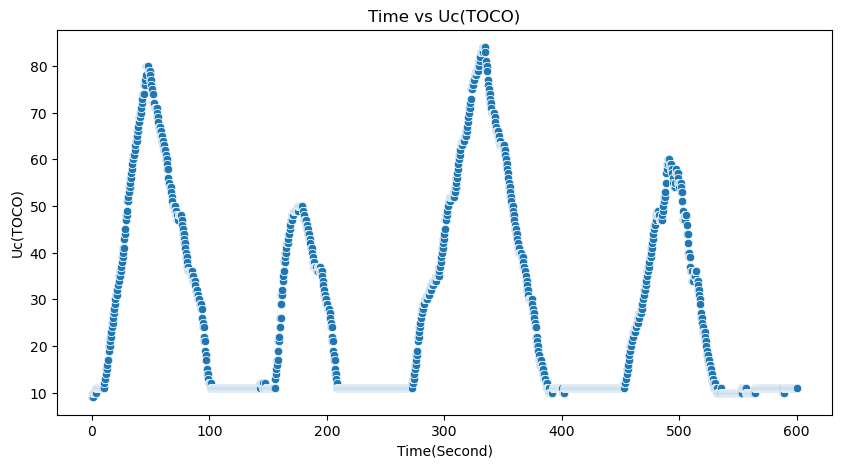

In [105]:
# plot the grap for Time vs Uc
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Time',y='UC') # plot using seaborn
# plt.plot(data['Time(Second)'], data['Uc(TOCO)']) # plot using matplotlib.pyplot
plt.title('Time vs Uc(TOCO)')
plt.xlabel('Time(Second)')
plt.ylabel('Uc(TOCO)')

#### Same as above Every 100 Secound of Time the UC is Increseing and Decreseing. The firt 0-100 its increseing and 100-150 it decreseing. But secound time UC increseing is less compare to first time.LIke wise it is increseing.

----------------------------------------------------------------------------------------------------------------------------------

### 2. FHR Analysis:

 - Divide each minute of the NST (Non-Stress Test) reading into sixteen 3.75-second
epochs.
 - For each epoch, calculate the average FHR in two ways:
1. Beats per minute (bpm).
2. Pulse interval (milliseconds). Example: An FHR of 120 bpm is equivalent
to a pulse interval of 500 milliseconds.
○ Use the average pulse interval of each epoch for further

In [134]:
# Calculate the number of epochs
epoch = int(3.75 / 0.25)
epoch

15

In [135]:
# Reshape FHR data into epochs
data1 = np.array_split(data['FHR'], len(data) // epoch)
data1

C:\Users\pokie\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


[0     126
 1     126
 2     126
 3     126
 4     126
 5     126
 6     127
 7     127
 8     127
 9     127
 10    128
 11    128
 12    127
 13    127
 14    127
 Name: FHR, dtype: int64,
 15    127
 16    127
 17    127
 18    126
 19    126
 20    126
 21    126
 22    125
 23    125
 24    125
 25    125
 26    125
 27    125
 28    125
 29    125
 Name: FHR, dtype: int64,
 30    125
 31    125
 32    124
 33    124
 34    124
 35    124
 36    125
 37    125
 38    125
 39    125
 40    125
 41    125
 42    124
 43    124
 44    123
 Name: FHR, dtype: int64,
 45    123
 46    123
 47    123
 48    124
 49    124
 50    125
 51    125
 52    125
 53    125
 54    125
 55    125
 56    125
 57    125
 58    125
 59    125
 Name: FHR, dtype: int64,
 60    126
 61    126
 62    126
 63    126
 64    126
 65    126
 66    126
 67    126
 68    126
 69    126
 70    126
 71    126
 72    126
 73    126
 74    126
 Name: FHR, dtype: int64,
 75    126
 76    126
 77    126
 78    127
 

In [136]:
avg_data1 = [i.mean() for i in data1]
avg_data1

[126.73333333333333,
 125.66666666666667,
 124.46666666666667,
 124.46666666666667,
 126.0,
 126.66666666666667,
 125.53333333333333,
 126.86666666666666,
 127.8,
 130.06666666666666,
 136.6,
 142.6,
 149.2,
 154.66666666666666,
 155.0,
 157.4,
 161.46666666666667,
 158.66666666666666,
 157.73333333333332,
 158.4,
 153.4,
 147.66666666666666,
 139.2,
 137.73333333333332,
 136.86666666666667,
 133.8,
 130.6,
 128.2,
 128.06666666666666,
 126.46666666666667,
 127.46666666666667,
 125.46666666666667,
 123.6,
 124.53333333333333,
 125.73333333333333,
 125.33333333333333,
 123.26666666666667,
 125.53333333333333,
 126.53333333333333,
 126.13333333333334,
 127.6,
 126.0,
 128.06666666666666,
 128.73333333333332,
 127.2,
 126.66666666666667,
 127.6,
 128.4,
 128.06666666666666,
 126.86666666666666,
 127.53333333333333,
 127.8,
 127.2,
 129.06666666666666,
 132.93333333333334,
 142.4,
 147.13333333333333,
 151.26666666666668,
 152.2,
 155.93333333333334,
 158.13333333333333,
 157.8666666666666

In [137]:
pulse_interval_data1 = [60000 / i for i in avg_data1]
pulse_interval_data1

[473.4350341925302,
 477.45358090185675,
 482.05677557579,
 482.05677557579,
 476.1904761904762,
 473.6842105263158,
 477.9607010090281,
 472.93746715712035,
 469.4835680751174,
 461.30189646335214,
 439.2386530014642,
 420.75736325385697,
 402.1447721179625,
 387.93103448275866,
 387.0967741935484,
 381.1944091486658,
 371.5937241948803,
 378.15126050420173,
 380.3888419273035,
 378.78787878787875,
 391.1342894393742,
 406.3205417607224,
 431.0344827586207,
 435.62439496611813,
 438.3828543594739,
 448.43049327354254,
 459.41807044410416,
 468.01872074883,
 468.50598646538265,
 474.43331576172903,
 470.7112970711297,
 478.2146652497343,
 485.4368932038835,
 481.7987152034261,
 477.20042417815483,
 478.72340425531917,
 486.749594375338,
 477.9607010090281,
 474.18335089567967,
 475.6871035940803,
 470.21943573667716,
 476.1904761904762,
 468.50598646538265,
 466.0797514241326,
 471.6981132075472,
 473.6842105263158,
 470.21943573667716,
 467.2897196261682,
 468.50598646538265,
 472.937

In [138]:
# Create DataFrame for epoch results
data2 = pd.DataFrame({
    'Epoch': range(1, len(avg_data1) + 1),
    'Average_FHR': avg_data1,
    'Pulse_Interval_FHR': pulse_interval_data1
})

In [139]:
data2.head()

,Epoch,Average_FHR,Pulse_Interval_FHR
0,1,126.733333,473.435034
1,2,125.666667,477.453581
2,3,124.466667,482.056776
3,4,124.466667,482.056776
4,5,126.000000,476.190476


In [140]:
data2.shape

(160, 3)

--------------------------------------------------------------------------------------------------------------------------------------

#### 3. UC Peak Detection:

 - Using any suitable Python library (e.g., SciPy), perform peak detection on the UC graph.
 - For each detected peak:
1. Find the width of the peak at half its maximum height.
2. Count peaks where the width is more than 30 seconds.
 - Calculate and report the average duration of the counted UC peaks.

In [114]:
from scipy.signal import find_peaks, peak_widths

In [151]:
# Detect peaks in the UC data
peaks, _ = find_peaks(data['UC'], height=5)  # Adjust height threshold as needed
peaks

array([ 187,  298,  576,  588,  708,  771, 1333, 1526, 1584, 1925, 1962,
       1988, 2001, 2020, 2054, 2118, 2140, 2218, 2303], dtype=int64)

In [142]:
# Find widths of the peaks at half the height
widths = peak_widths(data['UC'], peaks, rel_height=0.5)
widths

(array([194.25,  10.  ,  10.  ,   2.  , 147.75,   8.  , 231.  ,   2.  ,
         34.  ,   5.  , 152.5 ,   8.5 ,   4.  ,   5.75,   6.5 ,   2.  ,
          2.  ,  14.  ,  96.  ]),
 array([45.5, 47.5, 11.5, 11.5, 30.5, 36.5, 47. , 16.5, 10.5, 48. , 35. ,
        56. , 54.5, 47.5, 35. , 11.5, 10.5, 10.5, 10.5]),
 array([ 113.25,  293.5 ,  571.5 ,  587.5 ,  643.75,  767.5 , 1205.  ,
        1525.5 , 1567.5 , 1923.  , 1889.  , 1985.5 , 1999.5 , 2017.5 ,
        2051.  , 2117.5 , 2139.5 , 2211.5 , 2255.5 ]),
 array([ 307.5 ,  303.5 ,  581.5 ,  589.5 ,  791.5 ,  775.5 , 1436.  ,
        1527.5 , 1601.5 , 1928.  , 2041.5 , 1994.  , 2003.5 , 2023.25,
        2057.5 , 2119.5 , 2141.5 , 2225.5 , 2351.5 ]))

In [143]:
# Convert widths from number of points to time in seconds (each point is 0.25 seconds)
peak_widths_in_seconds = widths[0] * 0.25
peak_widths_in_seconds

array([48.5625,  2.5   ,  2.5   ,  0.5   , 36.9375,  2.    , 57.75  ,
        0.5   ,  8.5   ,  1.25  , 38.125 ,  2.125 ,  1.    ,  1.4375,
        1.625 ,  0.5   ,  0.5   ,  3.5   , 24.    ])

In [144]:
# Count peaks wider than 30 seconds
wide_peaks_count = np.sum(peak_widths_in_seconds > 30)
wide_peaks_count

4

In [145]:
# Calculate average duration of wide peaks
avg_peak_duration = np.mean(peak_widths_in_seconds[peak_widths_in_seconds > 30])
avg_peak_duration

45.34375

In [146]:
print(f"Number of wide peaks: {wide_peaks_count}")
print(f"Average duration of wide peaks: {avg_peak_duration:.2f} seconds")

Number of wide peaks: 4
Average duration of wide peaks: 45.34 seconds
